In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# show more colums
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

/opt/homebrew/Caskroom/miniconda/base/envs/ml_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv("../data/delta_combined_flights_2018_2019_averages_regression_ready_lga.csv")
df.head()

,FlightDate,ArrDelay,Distance,CRSDepTime,CRSElapsedTime,CRSArrTime,DayOfWeek,Year,Month,AverageDelayPerFlightNumber,AverageDelayPerDistanceGroup,AverageDelayPerAircraft,ATL,DTW,LAX,MSY,RDU,IAH,CLT,FLL,BNA,LGA,JAX,SLC,SEA,OAK,VPS,LIH,TLH,PHX,RIC,MCO,ORD,ABQ,OGG,MSP,PIT,CID,LIT,RSW,STL,PDX,MEM,ROA,GSP,IAD,BOS,FNT,HSV,MIA,...,SNA,ICT,KOA,BOI,BIL,SDF,BIS,AVP,SYR,MSN,SAV,MDT,GSO,RNO,EGE,TUL,XNA,COS,FAI,MHT,GPT,STT,STX,TYS,GRB,PHF,CAE,BTR,LFT,MOB,AVL,ABE,AGS,ILM,EVV,ONT,DSM,FCA,CRW,BTV,GNV,HPN,TVC,RAP,PSC,JNU,SBN,GTF,BUR,LGB
0,2018-01-01,-20.0,502.0,837.0,123.0,1040,1,2018,1,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,18.0,1076.0,1486.0,183.0,1749,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,-26.0,1096.0,905.0,209.0,1234,1,2018,1,0.0,9.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,4.0,950.0,806.0,187.0,1113,1,2018,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,5.0,950.0,1525.0,189.0,1834,1,2018,1,0.0,4.0,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train = df[df["FlightDate"] < "2019-10-01"]
df_test = df[df["FlightDate"] >= "2019-10-01"]

# drop FlightDate
df_train = df_train.drop("FlightDate", axis=1)
df_test = df_test.drop("FlightDate", axis=1)

# Get the arrays
X_train, y_train = df_train.drop("ArrDelay", axis=1), df_train["ArrDelay"]
X_test, y_test = df_test.drop("ArrDelay", axis=1), df_test["ArrDelay"]

# Linear Regression

In [21]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root Mean squared error: 51.23
Mean absolute error: 31.04
Coefficient of determination: 0.01


# Random Forest

In [8]:
# Create a random forest
rf = RandomForestRegressor(n_estimators=100, random_state=1601)

# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1601)

Root Mean Squared Error: 28.93
Mean absolute error: 17.84
Coefficient of determination: 0.68


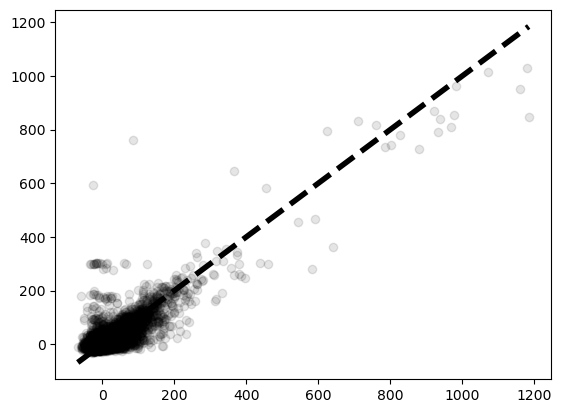

In [9]:
# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

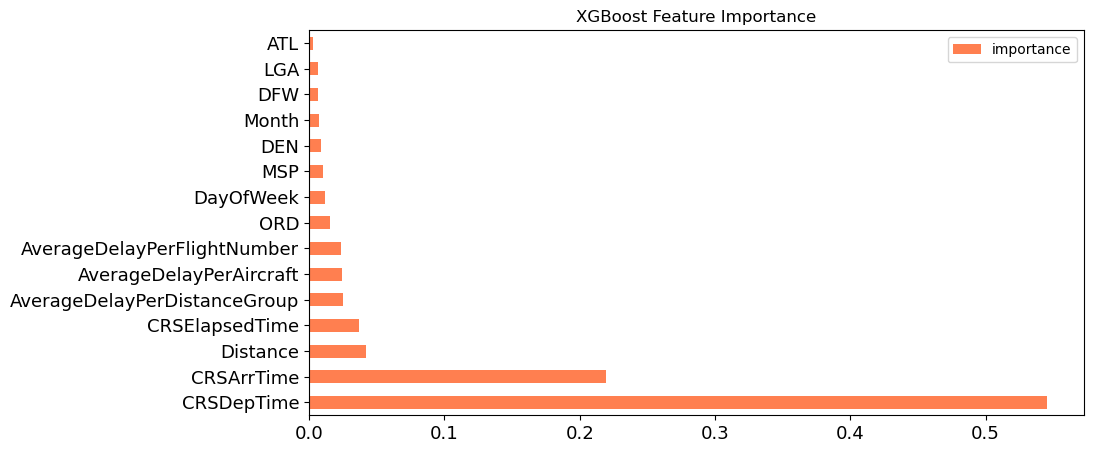

In [10]:
## feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:15]

feature_importance.plot(
    kind="barh",
    figsize=(10, 5),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

# XGBoost

In [16]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=1601)

# Train the model using the training sets
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1601,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Root Mean squared error: 33.22
Mean absolute error: 18.08
Coefficient of determination: 0.58


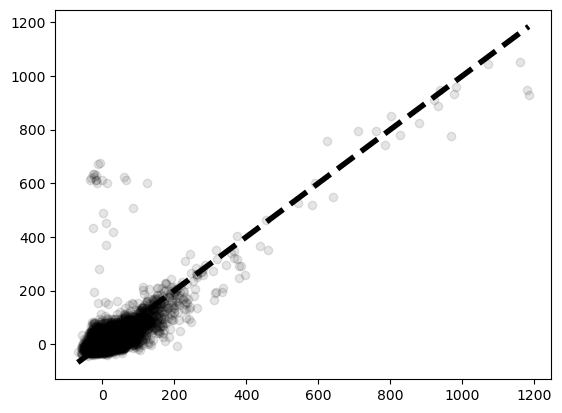

In [17]:
# Make predictions using the testing set
y_pred = xgb.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

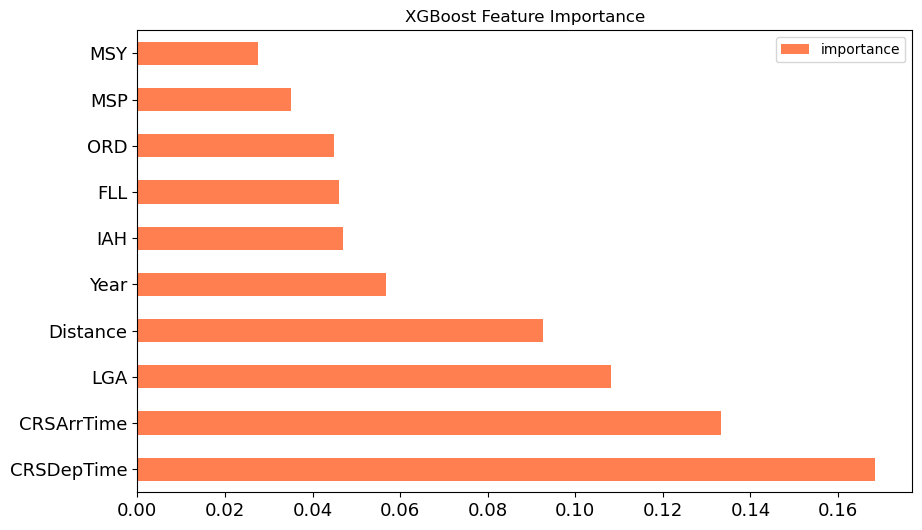

In [18]:
## feature importance
feature_importance = pd.DataFrame(
    xgb.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:10]

feature_importance.plot(
    kind="barh",
    figsize=(10, 6),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

<AxesSubplot:>

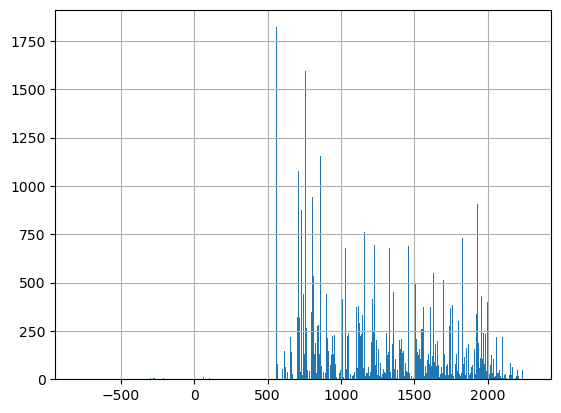

In [4]:
# pplot the CRSArrTime
df["CRSDepTime"].hist(bins=1000)